In [91]:
#1 ) Pandas read in CSV file
import pandas as pandas
import numpy as np
import somoclu #Self organizing map on a cluster
import matplotlib.pyplot as plt

#! pwd #Prints working directory
directory = ''
filename = 'numbers.csv'
seperator = ','
header_row_number = None
label_column_number = 0;

dataframe = pandas.read_csv(directory + filename,
                            sep=seperator,
                            header=header_row_number,
                            index_col=label_column_number)

#Hier de bewuste csv file met de data set
#De data set bevat in de eerste kolom het label (cijfer, underscore als separator, volgnr)
#gevolgd door een 150 lange vector met 1 en 0.
#Deze vector is eigenlijk opgebouwd uit 15 rijen van 10 kolommen,
#dus 150 cijfers achterelkaar (1 == zwart).
#Je ziet dat het aantal versies van één cijfer kan varieeren, bij de 5 20-stuks en bij de 1 bv 14 stuks.

In [92]:
#2 ) Organize dataset

# Drops column if all rows have NA for this column
dataframe = dataframe.dropna(1,'all')
labels = dataframe.index.astype(str);
data = dataframe.to_numpy()




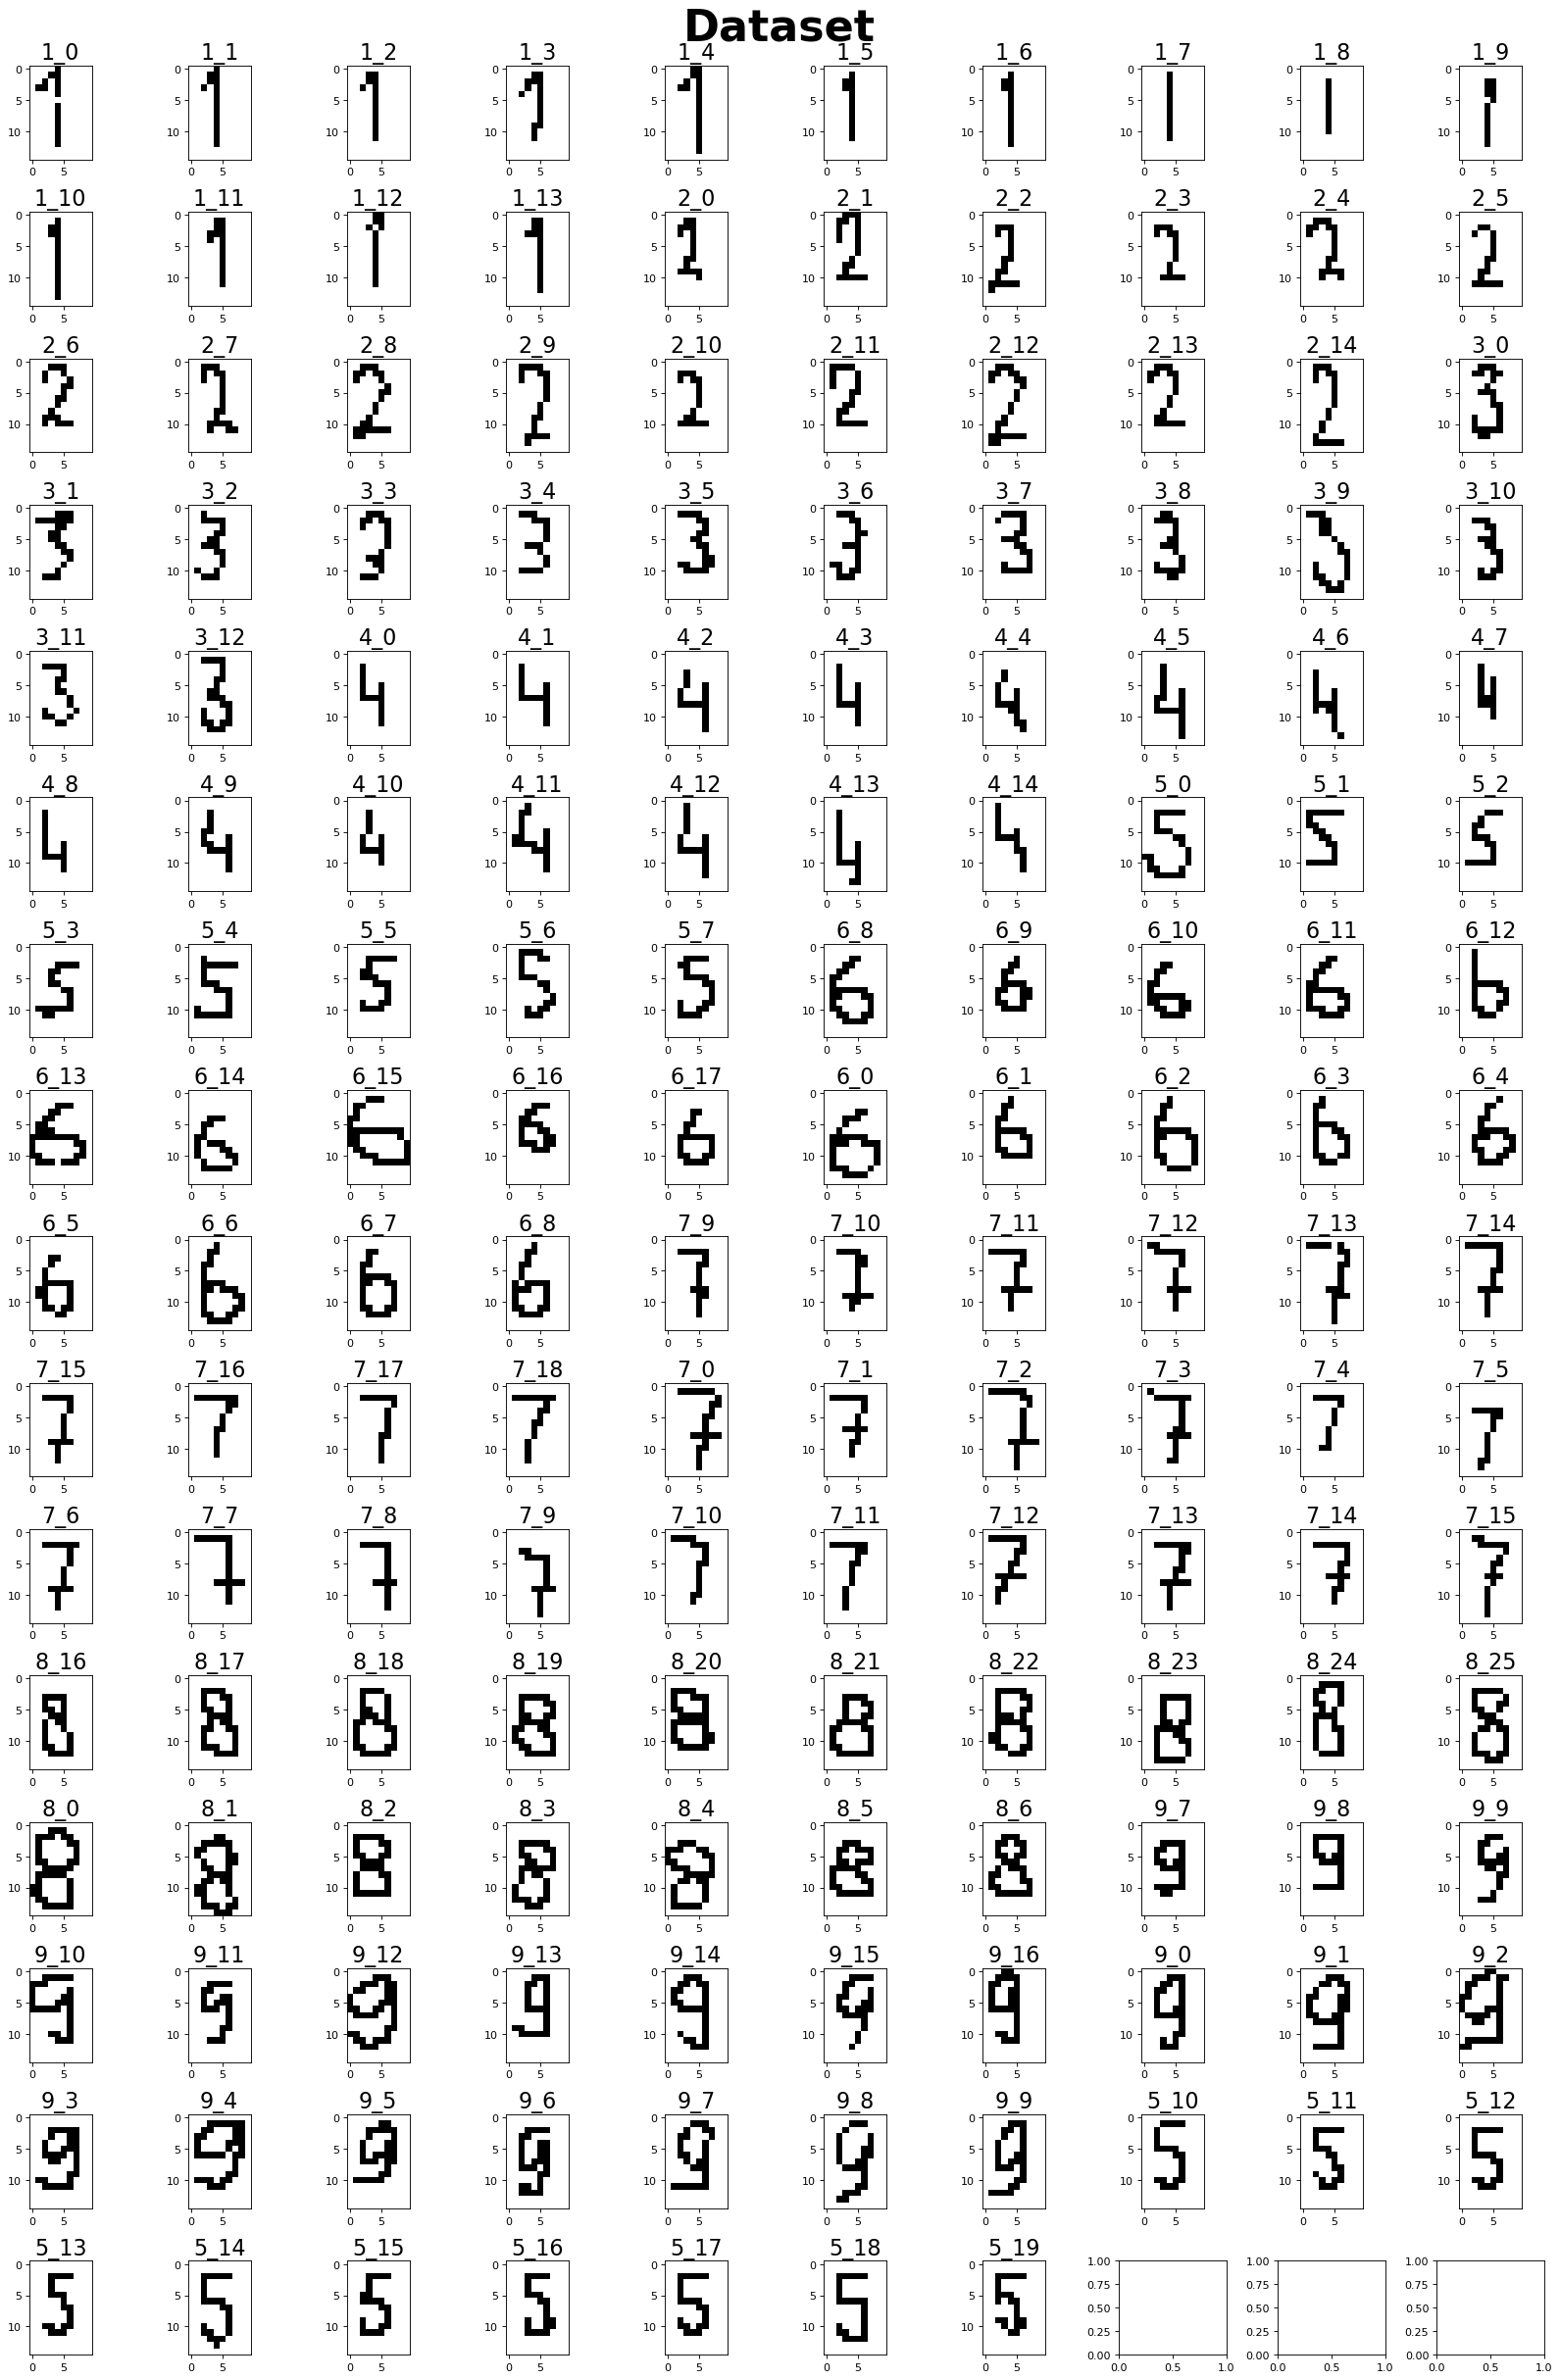

In [93]:
fig, axs = plt.subplots(nrows=16,
                        ncols=10,
                        #sharex=True,
                        #sharey=True,
                        figsize=(20, 30),
                        dpi=80#,
                        #subplot_kw={'xticks': np.arange(10),'yticks': np.arange(15)}
                       )

interpolations = [None,'nearest', 'bilinear', 'bicubic', 'spline16',
                  'spline36', 'hanning', 'hamming', 'hermite', 'kaiser',
                  'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell',
                  'sinc', 'lanczos']

for ax, row, label in zip(axs.flat, data, labels):
    reshaped_row = row.reshape(15,10)#TODO: Make this configurable
    #ax.imshow(reshaped_row, cmap=plt.cm.binary, interpolation='gaussian') #TODO: Configurabele interpolation
    ax.imshow(reshaped_row, cmap=plt.cm.binary, interpolation=None)
    #ax.imshow(reshaped_row, cmap=plt.cm.binary, interpolation=interpolations[15])
    ax.set_title(str(label), fontsize=20)
    firstTime=False

plt.suptitle('Dataset', fontsize=40, weight='bold', x=0.5, y=1.01)
plt.tight_layout(pad=1)
#plt.interactive(True)
plt.show()

In [9]:
#from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
#help(np.random.rand)

#c1 = np.random.rand(50, 3)/5
#c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
#c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5

#data = np.float32(np.concatenate((c1, c2, c3)))

#colors = ["red"] * 50
#colors.extend(["green"] * 50)
#colors.extend(["blue"] * 50)

#help(plt.figure)

#fig = plt.figure()
#ax = Axes3D(fig)
#ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)

#labels = range(150)

In [267]:
#dataset size = 157 x 150
#print(data)
number_of_columns = 100
number_of_rows = 100

#help(somoclu.Somoclu)

som = somoclu.Somoclu(number_of_columns, number_of_rows, maptype='planar', kerneltype=0, verbose=2)

#som.view_activation_map()
#som.view_component_planes()
#som.view_similarity_matrix()
#som.view_umatrix()

In [268]:
%time som.train(np.float32(data), epochs=10, scale0=1, scaleN=0.1)

CPU times: user 10.9 s, sys: 458 ms, total: 11.3 s
Wall time: 6.25 s


In [303]:
def getActivationMap(index):
    return som.view_activation_map(data_index=index, colormap='Greys')

#getActivationMap(0)

[[50 23]
 [56 21]
 [66 19]
 [15 90]
 [ 3 86]
 [51  7]
 [49 14]
 [60 12]
 [60  2]
 [62  0]
 [48 18]
 [14 90]
 [69  5]
 [ 7 80]
 [67 37]
 [ 0 89]
 [73 31]
 [ 0 98]
 [12 92]
 [ 0 95]
 [92  4]
 [ 5 98]
 [97 18]
 [35 84]
 [ 0 98]
 [85  0]
 [14 93]
 [88  0]
 [ 8 93]
 [90 13]
 [74  8]
 [72  2]
 [52 96]
 [93  9]
 [93  6]
 [14 77]
 [99  2]
 [82  5]
 [56 37]
 [ 6 73]
 [82 24]
 [93 15]
 [87 82]
 [46 22]
 [42 69]
 [84 77]
 [33 64]
 [52 50]
 [91 69]
 [25 70]
 [99 76]
 [45 57]
 [27 69]
 [37 12]
 [53 66]
 [94 65]
 [ 0 70]
 [25 36]
 [79 92]
 [17 65]
 [ 3 64]
 [ 0 56]
 [76 62]
 [99 97]
 [65 45]
 [ 7 33]
 [80 45]
 [19 48]
 [ 8 45]
 [93 61]
 [18 37]
 [28 56]
 [93 35]
 [84 64]
 [92 44]
 [ 7  6]
 [89 53]
 [41 44]
 [99 53]
 [90 34]
 [ 7 55]
 [36 51]
 [48 35]
 [13 21]
 [58 92]
 [25 91]
 [47 85]
 [58 92]
 [44  1]
 [38 76]
 [42 93]
 [29 97]
 [77 91]
 [21 96]
 [38  2]
 [31 98]
 [50  5]
 [62 83]
 [26 95]
 [32 78]
 [45 92]
 [38  6]
 [54 76]
 [54  0]
 [33 88]
 [79  0]
 [98  0]
 [47 85]
 [67 97]
 [38 93]
 [ 6 62]
 

<IPython.core.display.Javascript object>


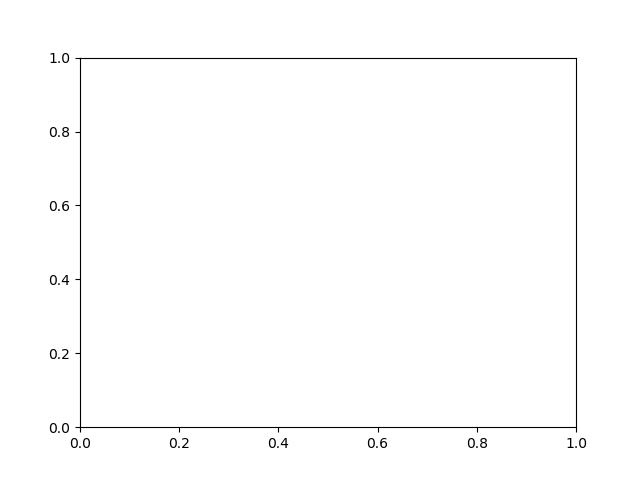

In [317]:
%matplotlib notebook

def getFirstCharacter(string):
    return string[0]

colors = list()

for label in labels:
    colors.append(int(getFirstCharacter(label)))

#som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels, filename="test.svg")


print(som.get_bmus(som.get_surface_state()))


def hover(event):
    
    
    
    print(event.inaxes)
    annotation.set_visible(True)
    annotation.set_text(event.inaxes)

plt.gcf().canvas.mpl_connect("motion_notify_event", hover)

annotation = plt.gca().annotate("This is an annotation", xy=(60,60))
annotation.set_visible(True)

In [283]:
#get_bmus
#som.get_bmus()

#som.view_activation_map(data_index=1, colormap='Greys')



In [282]:
# x) Export as SVG / BMP

#import numpy as np
#x = np.arange(0,100,0.00001)
#y = x*np.sin(2*np.pi*x)
#print(plt.plot(y))

#plt.savefig("test.svg", format="svg")

In [ ]:
#TODO: Visualize correlation / covariance? Standard deviation?